In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('assets/D3.csv')
df.head

<bound method NDFrame.head of           X1        X2        X3         Y
0   0.000000  3.440000  0.440000  4.387545
1   0.040404  0.134949  0.888485  2.679650
2   0.080808  0.829899  1.336970  2.968490
3   0.121212  1.524848  1.785455  3.254065
4   0.161616  2.219798  2.233939  3.536375
..       ...       ...       ...       ...
95  3.838384  1.460202  3.046061 -4.440595
96  3.878788  2.155152  3.494545 -4.458663
97  3.919192  2.850101  3.943030 -4.479995
98  3.959596  3.545051  0.391515 -3.304593
99  4.000000  0.240000  0.840000 -5.332455

[100 rows x 4 columns]>

In [31]:
X1 = df.values[:,0]
X2 = df.values[:,1]
X3 = df.values[:,2]
y = df.values[:,3]

m = len(X1)
n = len(y)



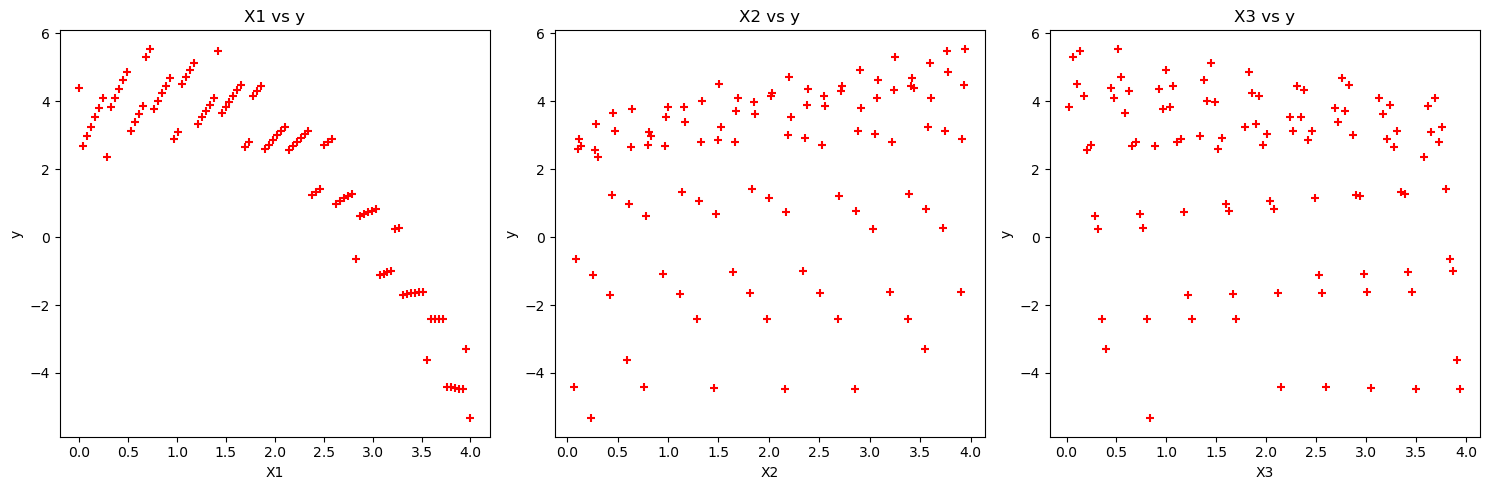

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(X1, y, color='red', marker='+')
ax1.set_title('X1 vs y')
ax1.set_xlabel('X1')
ax1.set_ylabel('y')

ax2.scatter(X2, y, color='red', marker='+')
ax2.set_title('X2 vs y')
ax2.set_xlabel('X2')
ax2.set_ylabel('y')

ax3.scatter(X3, y, color='red', marker='+')
ax3.set_title('X3 vs y')
ax3.set_xlabel('X3')
ax3.set_ylabel('y')

plt.tight_layout()
plt.show()


In [10]:
def predict(X, theta):
    return np.dot(X, theta)

def compute_loss(X, y, theta):
    m = len(y)
    predictions = predict(X, theta)
    loss = (1/(2*m)) * np.sum((predictions - y)**2)
    return loss

def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    loss_history = []
    
    for _ in range(num_iterations):
        predictions = X.dot(theta)
        error = predictions - y
        gradient = X.T.dot(error) / m
        theta -= learning_rate * gradient
        
        # Calculate and store the current loss
        loss = np.mean((predictions - y) ** 2) / 2
        loss_history.append(loss)
    
    return theta, loss_history




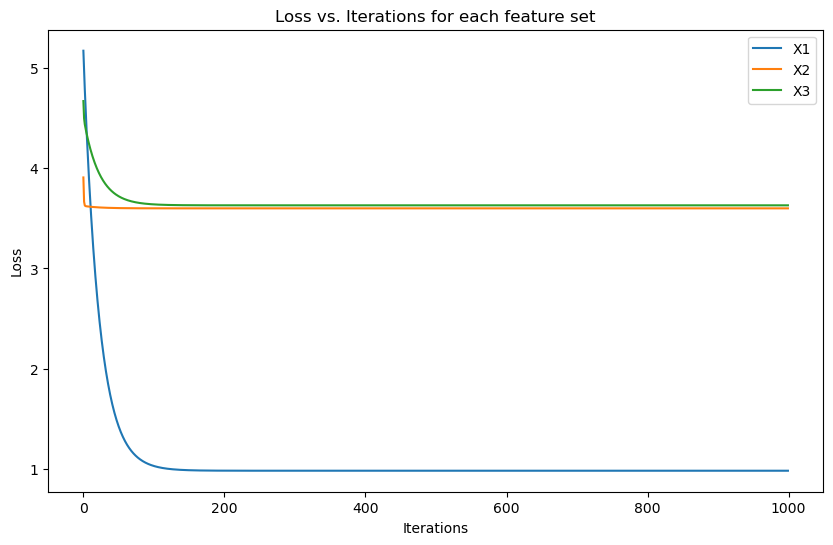

Predictions: [ 3.92673701 -0.23065589  0.40767135]


In [36]:
learning_rate = .1
num_iterations = 1000

# Train on X1
X1_b = np.c_[np.ones((n, 1)), X1]
theta1 = np.zeros(2)
theta1, loss_history1 = gradient_descent(X1_b, y, theta1, learning_rate, num_iterations)

# Train on X2
X2_b = np.c_[np.ones((n, 1)), X2]
theta2 = np.zeros(2)
theta2, loss_history2 = gradient_descent(X2_b, y, theta2, learning_rate, num_iterations)

# Train on X3
X3_b = np.c_[np.ones((n, 1)), X3]
theta3 = np.zeros(2)
theta3, loss_history3 = gradient_descent(X3_b, y, theta3, learning_rate, num_iterations)

# Combine thetas
theta_combined = np.array([theta1[0], theta1[1], theta2[1], theta3[1]])

# Visualize the loss
plt.figure(figsize=(10, 6))
plt.plot(loss_history1, label='X1')
plt.plot(loss_history2, label='X2')
plt.plot(loss_history3, label='X3')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations for each feature set')
plt.legend()
plt.show()

# Now you can predict using all features
new_X = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
new_X_b = np.c_[np.ones((len(new_X), 1)), new_X]
predictions = predict(new_X_b, theta_combined)
print("Predictions:", predictions)

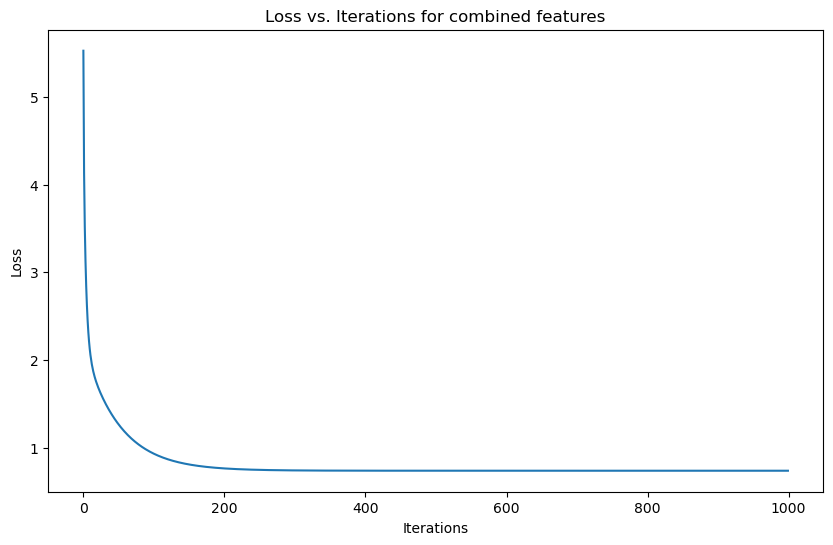

Predictions: [3.57728282 0.24429082 0.10251123]
Learned parameters:
Bias: 5.313935769531634
Coefficient for X1: -2.0036865792753904
Coefficient for X2: 0.5326015740310899
Coefficient for X3: -0.2655679465553415


In [40]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    loss_history = []
    
    for _ in range(num_iterations):
        predictions = X.dot(theta)
        error = predictions - y
        gradient = X.T.dot(error) / m
        theta -= learning_rate * gradient
        
        # Calculate and store the current loss
        loss = np.mean((predictions - y) ** 2) / 2
        loss_history.append(loss)
    
    return theta, loss_history

def predict(X, theta):
    return X.dot(theta)

# Assuming X1, X2, X3, y, and n are defined elsewhere

# Combine all features
X_combined = np.c_[X1, X2, X3]

# Add bias term
X_b = np.c_[np.ones((n, 1)), X_combined]

# Initialize theta
theta = np.zeros(X_b.shape[1])

# Set hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Train on all features simultaneously
theta, loss_history = gradient_descent(X_b, y, theta, learning_rate, num_iterations)

# Visualize the loss
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations for combined features')
plt.show()

# Now you can predict using all features
new_X = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
new_X_b = np.c_[np.ones((len(new_X), 1)), new_X]
predictions = predict(new_X_b, theta)
print("Predictions:", predictions)

# Print the learned parameters
print("Learned parameters:")
print(f"Bias: {theta[0]}")
print(f"Coefficient for X1: {theta[1]}")
print(f"Coefficient for X2: {theta[2]}")
print(f"Coefficient for X3: {theta[3]}")

Final training cost (regularized): 675125835789.5194
Final validation cost (unregularized): 1146465393448.176


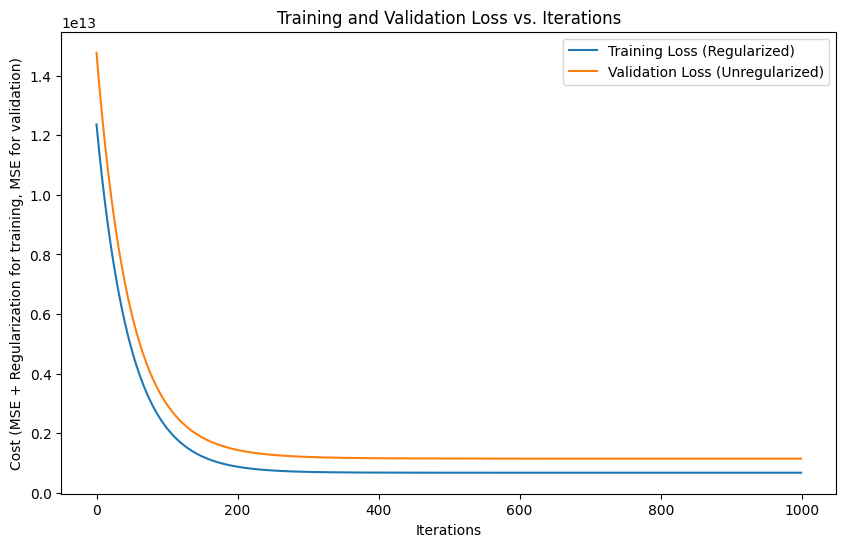

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("assets/Housing.csv")
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize only the input features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)

# Add a column of ones to X for the bias term
X_train_scaled = np.column_stack((np.ones(X_train_scaled.shape[0]), X_train_scaled))
X_val_scaled = np.column_stack((np.ones(X_val_scaled.shape[0]), X_val_scaled))

# Initialize theta
theta = np.zeros(X_train_scaled.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 1000
lambda_param = 0.01

def compute_cost(X, y, theta, lambda_param=0):
    m = len(y)
    predictions = np.dot(X, theta)
    mse = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    if lambda_param > 0:
        regularization = (lambda_param / (2 * m)) * np.sum(theta[1:]**2)
        return mse + regularization
    return mse

def gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, iterations, lambda_param):
    m = len(y_train)
    train_cost_history = []
    val_cost_history = []
    
    for _ in range(iterations):
        predictions = np.dot(X_train, theta)
        gradients = (1/m) * np.dot(X_train.T, (predictions - y_train))
        gradients[1:] += (lambda_param / m) * theta[1:]  # Apply regularization to all but the bias term
        
        theta -= learning_rate * gradients
        
        train_cost = compute_cost(X_train, y_train, theta, lambda_param)  # Regularized cost for training
        val_cost = compute_cost(X_val, y_val, theta)  # Unregularized cost for validation
        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)
    
    return theta, train_cost_history, val_cost_history

# Run gradient descent
theta, train_cost_history, val_cost_history = gradient_descent(X_train_scaled, y_train, X_val_scaled, y_val, theta, learning_rate, iterations, lambda_param)

# Compute final training and validation costs
final_train_cost = compute_cost(X_train_scaled, y_train, theta, lambda_param)  # Regularized
final_val_cost = compute_cost(X_val_scaled, y_val, theta)  # Unregularized

print(f"Final training cost (regularized): {final_train_cost}")
print(f"Final validation cost (unregularized): {final_val_cost}")

# Plot training and validation costs
plt.figure(figsize=(10, 6))
plt.plot(train_cost_history, label='Training Loss (Regularized)')
plt.plot(val_cost_history, label='Validation Loss (Unregularized)')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE + Regularization for training, MSE for validation)')
plt.title('Training and Validation Loss vs. Iterations')
plt.legend()
plt.show()